In [1]:
import numpy as np

# Questions about Vectors:

## 1. How do you calculate the difference between two vectors?

In [2]:
# Create two example matrices
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[2, 3, 4], [5, 6, 7]])

# Calculate the difference
diff = A - B

# Calculate the magnitude of difference
magnitude = np.linalg.norm(diff)

print(f"Magnitude of difference: {magnitude}")

Magnitude of difference: 2.449489742783178


## 2. How do you calculate the inner product (dot product) of vectors?

Compute the dot product of vectors **a** and **b**:
     $$
     \mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + \dots + a_n b_n
     $$


In [3]:
# Define two vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Calculate dot product
dot_product = np.dot(a, b)

print(f"Dot product: {dot_product}")

Dot product: 32


## 3.	How do you calculate the projection of one vector onto another?

### Vector Projection

The projection of one vector onto another is a way to express one vector in terms of another. The formula for projecting vector **a** onto vector **b** is given by:

$$
 \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|^2} \mathbf{b}
$$


### Where:

- **a** · **b** is the dot product of vectors **a** and **b**.
- $\|\mathbf{b}\|^2$ is the square of the magnitude (norm) of vector **b**, calculated as:
  $$
  \|\mathbf{b}\|^2 = b_1^2 + b_2^2 + \dots + b_n^2
  $$
- **b** is the vector onto which we're projecting.


This results in the projection of vector $\mathbf{a}$ onto vector $\mathbf{b}$, representing the component of $\mathbf{a}$ that is parallel to $\mathbf{b}$.


In [4]:
def vector_projection(a, b):
    return (np.dot(a, b) / np.dot(b, b)) * b

# Example vectors
a = np.array([2, -3, 5])
b = np.array([3, 6, -4])

# Calculate projection
proj = vector_projection(a, b)

print(f"Projection of a onto b: {proj}")

Projection of a onto b: [-1.57377049 -3.14754098  2.09836066]


## 4.	How do you calculate the similarity between two vectors using dot product similarity and cosine similarity?

The cosine_similarity is used in the CML paper.

In [5]:
import numpy as np

# Define two example vectors
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Dot product similarity
dot_similarity = np.dot(a, b)

# Cosine similarity
cosine_similarity = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

print(f"Dot product similarity: {dot_similarity}")
print(f"Cosine similarity: {cosine_similarity}")


Dot product similarity: 32
Cosine similarity: 0.9746318461970762


## 5.	What does it mean for vectors to be orthogonal (perpendicular)? How can you determine whether two vectors are orthogonal (perpendicular)?

In [6]:
import numpy as np

def are_orthogonal(v1, v2):
    dot_product = np.dot(v1, v2)
    return np.isclose(dot_product, 0, atol=1e-8)

# Example 1: Orthogonal vectors
v1 = np.array([1, 0, 0])
v2 = np.array([0, 1, 0])
print(f"v1 and v2 are orthogonal: {are_orthogonal(v1, v2)}")

# Example 2: Non-orthogonal vectors
v3 = np.array([1, 1, 0])
v4 = np.array([1, 2, 0])
print(f"v3 and v4 are orthogonal: {are_orthogonal(v3, v4)}")

# Example 3: 
v5 = np.array([-3, 4])
v6 = np.array([4, 3])
print(f"v5 and v6 are orthogonal: {are_orthogonal(v5, v6)}")


v1 and v2 are orthogonal: True
v3 and v4 are orthogonal: False
v5 and v6 are orthogonal: True


## 6. Why are randomly chosen vectors in a high-dimensional space approximately orthogonal? Please design Python code to demonstrate it. 

### Hint: You'll need to create a function to generate random vectors that takes a dimension parameter. Additionally, write a function to check the orthogonality of two vectors. Explore various dimensions (say, from 100 to 10000)

As the number of dimensions increases, the probability of two random vectors being nearly perpendicular approaches 1. 

This phenomenon occurs because:

1. The available directions increase exponentially with dimensions.

2. The dot product of random unit vectors tends towards zero as dimensions increase.

3. The cosine of the angle between random vectors approaches zero in high dimensions.

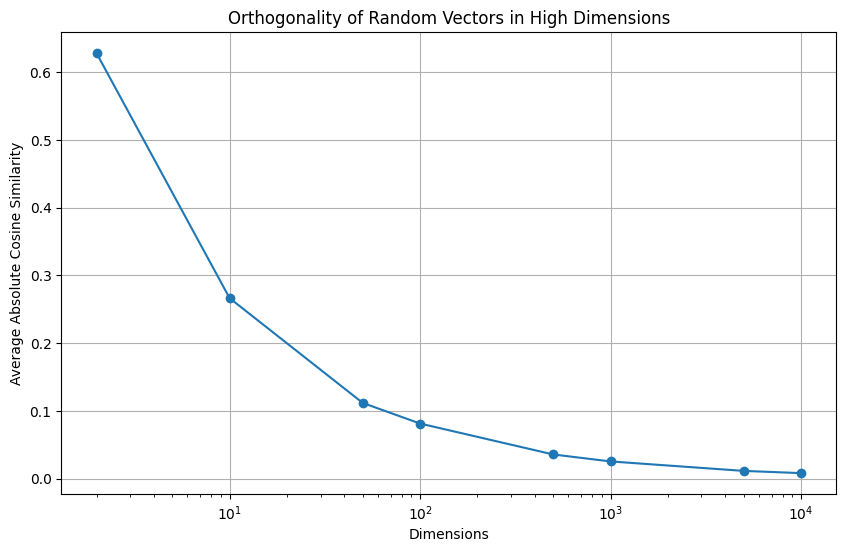

Average Absolute Cosine Similarities:
Dimensions: 2, Similarity: 0.628146
Dimensions: 10, Similarity: 0.266263
Dimensions: 50, Similarity: 0.111594
Dimensions: 100, Similarity: 0.081167
Dimensions: 500, Similarity: 0.035517
Dimensions: 1000, Similarity: 0.025222
Dimensions: 5000, Similarity: 0.011249
Dimensions: 10000, Similarity: 0.007968


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_vector(dim):
    return np.random.randn(dim)

def check_orthogonality(v1, v2):
    dot_product = np.dot(v1, v2)
    norm_product = np.linalg.norm(v1) * np.linalg.norm(v2)
    cosine_similarity = dot_product / norm_product
    return cosine_similarity

def experiment(dims, num_pairs=1000):
    results = []
    for dim in dims:
        cosine_sims = []
        for _ in range(num_pairs):
            v1 = generate_random_vector(dim)
            v2 = generate_random_vector(dim)
            cosine_sims.append(abs(check_orthogonality(v1, v2)))
        results.append(np.mean(cosine_sims))
    return results

# Run experiment
dimensions = [2, 10, 50, 100, 500, 1000, 5000, 10000]
avg_cosine_sims = experiment(dimensions)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(dimensions, avg_cosine_sims, marker='o')
plt.xscale('log')
plt.xlabel('Dimensions')
plt.ylabel('Average Absolute Cosine Similarity')
plt.title('Orthogonality of Random Vectors in High Dimensions')
plt.grid(True)
plt.show()

print("Average Absolute Cosine Similarities:")
for dim, sim in zip(dimensions, avg_cosine_sims):
    print(f"Dimensions: {dim}, Similarity: {sim:.6f}")


## 7. What is element-wise multiplication of two vectors?

In [8]:
import numpy as np

# Define two vectors
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

# Perform element-wise multiplication
result = a * b

print("Vector a:", a)
print("Vector b:", b)
print("Element-wise multiplication:", result)


Vector a: [1 2 3 4]
Vector b: [5 6 7 8]
Element-wise multiplication: [ 5 12 21 32]


# Questions about Matrices:

## 1.	What is the transpose of a matrix?

In [9]:
import numpy as np

# Create a 2D NumPy array (matrix)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6]])

print("Original matrix:")
print(matrix)

# Compute the transpose using transpose()
transposed_matrix = np.transpose(matrix)

print("\nTransposed matrix using np.transpose():")
print(transposed_matrix)

# Use the .T attribute
transposed_matrix_alt = matrix.T

print("\nTransposed matrix using .T attribute:")
print(transposed_matrix_alt)


Original matrix:
[[1 2 3]
 [4 5 6]]

Transposed matrix using np.transpose():
[[1 4]
 [2 5]
 [3 6]]

Transposed matrix using .T attribute:
[[1 4]
 [2 5]
 [3 6]]


## 2.	What is the definition of the inverse of a matrix? 


### Definition

For a square matrix $A$, its inverse $A^{-1}$ is a matrix that satisfies:

$$
A \cdot A^{-1} = A^{-1} \cdot A = I
$$


Where:
- $A$ is the original matrix
- $A^{-1}$ is the inverse of $A$
- $I$ is the identity matrix of the same size as $A$
- $·$ denotes matrix multiplication



## 3.	If vectors in a matrix are approximately orthogonal, can the transpose of the matrix approximately represent the inverse of the matrix?

### [Approximate Orthogonality and Matrix Inverse](pplx://action/followup)

When the vectors in a matrix are approximately orthogonal, the transpose of the matrix can indeed approximately represent its inverse. This relationship is closely tied to the properties of orthogonal matrices.

### [Key Concepts](pplx://action/followup)

1. **[Orthogonal Matrices](pplx://action/followup)**: A matrix $Q$ is orthogonal if its columns (or rows) are orthonormal (orthogonal and of unit length). For such matrices:

   $$Q^T Q = Q Q^T = I$$

   Where $Q^T$ is the transpose of $Q$, and $I$ is the identity matrix.

2. **[Inverse of Orthogonal Matrices](pplx://action/followup)**: For orthogonal matrices, the transpose is exactly equal to the inverse:

   $$Q^T = Q^{-1}$$

3. **[Approximate Orthogonality](pplx://action/followup)**: In practice, vectors may be nearly, but not exactly, orthogonal due to numerical precision or the nature of the data.

### [Approximation of Inverse](pplx://action/followup)

When a matrix $A$ has approximately orthogonal columns (or rows):

1. The dot products between different columns are close to zero.
2. The magnitudes of the columns are close to 1 (if normalized).

In this case:

$$A^T A \approx I$$

Consequently:

$$A^T \approx A^{-1}$$



# Questions about Algorithms:

## 1.	What is winner-take-all? How is it used in the CML algorithm? How can you implement it in Python? (Hint: argmax())

Winner-take-all is a computational method where the highest-valued element in a set is selected, while all others are suppressed. In electoral systems, it refers to a process where the candidate with the most votes wins all representation

In CML, it is used in the move_one_step() and run_t_sne(). Here is move_on_step():

```python
def move_one_step(self, loc, goal, a_record, affordance, action_to_node,
                      next_node_to_action,weight=False):  
        affordance_vector = torch.zeros(self.a_size, device=device)
        affordance_vector[affordance] = 1
        if weight:    
            for a in affordance:
                a = a.item()
                affordance_vector[a]/=(w_connection[action_to_node[a][0],
                                                    action_to_node[a][1]])
        affordance_vector_fix = affordance_vector.clone()
        not_recommended_actions = a_record
        affordance_vector_fix[not_recommended_actions] *= 0.

        delta = self.Q[:,goal]-self.Q[:,loc]
        utility = (self.W@delta) * affordance_vector_fix
        if torch.max(utility)!=0:
            action_idx = torch.argmax(utility).item()
        else:
            utility = (self.V.T@delta) * affordance_vector
            action_idx = torch.argmax(utility).item()

            
        return action_to_node[action_idx][1].item(), action_idx
```

In [10]:
import numpy as np

def winner_take_all(array):
    winner_index = np.argmax(array)
    result = np.zeros_like(array)
    result[winner_index] = 1
    return result, winner_index

# Example usage
input_array = np.array([0, 8, 0.3, 0.2, 5])
output, winner_index = winner_take_all(input_array)
print(output)  # [0. 1. 0. 0. 0.]
print(winner_index) # 1


[0. 1. 0. 0. 0.]
1


## 2.	What is embedding (encoding)?

The term "embedding" refers to the process of mapping raw data (e.g., observations, actions, sensory inputs, or graph nodes) into a structured, often high-dimensional space to enable geometric reasoning, planning, or learning. 

* **Embedding Observations/Actions**:

    Observations ($o$) and actions ($a$) are mapped into a high-dimensional state space via linear/nonlinear transformations (e.g., matrices $Q$ and $V$). This creates a geometric "cognitive map" where:

    * States (observations) are represented as vectors.

    * Actions are embedded as vectors that approximate transitions between states.

* **Purpose**:

    * Reduces planning to geometric heuristics (e.g., choosing actions that directionally align with goals in the embedded space).

    * Enables online learning via local synaptic plasticity rules, avoiding explicit graph traversal.

## 3. What is an undirected, unweighted graph? What are its basic components? How to represent them?

An undirected, unweighted graph has the basic components:

1. **Vertices (nodes)**: Points or objects in the graph

2. **Edges**: Connections between pairs of vertices



Representations of undirected, unweighted graphs:

1. **Adjacency Matrix**:

    * A square matrix where entry (i,j) is 1 if vertices i and j are connected, 0 otherwise
    
    * Symmetric for undirected graphs
    
2. **Adjacency List**:

    * A collection of lists, one for each vertex, containing its adjacent vertices
    
    * More space-efficient for sparse graphs
    
3. **Edge List**:

    * A list of pairs representing edges between vertices
    
    * Simple but less efficient for many operations



In [11]:
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.graph = [[] for _ in range(vertices)]

    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)  # For undirected graph

# Usage
g = Graph(4)
g.add_edge(0, 1)
g.add_edge(0, 2)
g.add_edge(1, 2)
g.add_edge(2, 3)


We can use the NetworkX library along with Matplotlib to visualize the graph relation from the Python Graph implementation. 

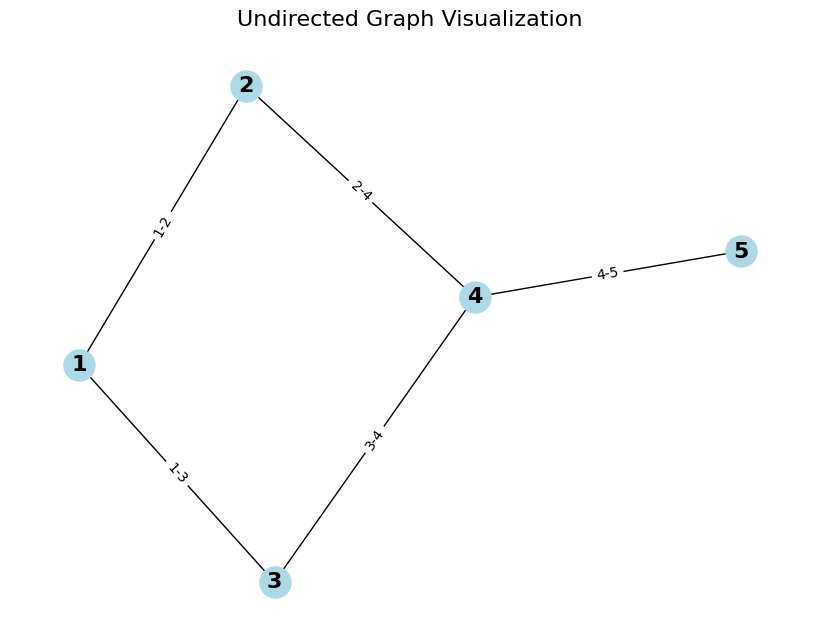

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an empty undirected graph
G = nx.Graph()

# Add nodes
G.add_nodes_from([1, 2, 3, 4, 5])

# Add edges
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# Set up the plot
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold')

# Add edge labels
edge_labels = {(u, v): f'{u}-{v}' for (u, v) in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title and remove axis
plt.title("Undirected Graph Visualization", fontsize=16)
plt.axis('off')

# Display the plot
plt.show()


## 4.	What is the task of finding the shortest path in a given graph? Explain its objective.

Its objective is to determine the path between two vertices in a graph that minimizes the sum of the weights of its constituent edges.

## 5.	Explain weighted and directed graphs. What are the differences between them, and which type was used in the first task of the paper?



### Weighted Graphs
- A **weighted graph** assigns numerical values (weights) to its edges.
- These weights can represent various attributes like distance, cost, or time.
- Weights can be applied to both directed and undirected edges.
- Useful for modeling relationships where the connection between nodes has a quantifiable value.

### Directed Graphs (Digraphs)
- A **directed graph** consists of edges that have a specific direction, often represented by arrows.
- Each edge is an ordered pair of vertices, indicating a one-way relationship.
- The order of vertices in a directed edge matters, as it specifies the direction of the relationship.
- Useful for modeling one-way relationships or flows.

### Key Differences
1. **Edge Properties**: 
   - Weighted graphs focus on numerical values assigned to edges.
   - Directed graphs focus on the direction of edges.

2. **Symmetry**: 
   - Weighted graphs can be symmetric or asymmetric.
   - Directed graphs are inherently asymmetric.

3. **Representation**: 
   - Weighted graphs often show edge labels with weights.
   - Directed graphs use arrows to indicate edge direction.

4. **Applications**: 
   - Weighted graphs are commonly used for shortest path problems and network optimization.
   - Directed graphs are useful for modeling dependencies, hierarchies, or one-way relationships.




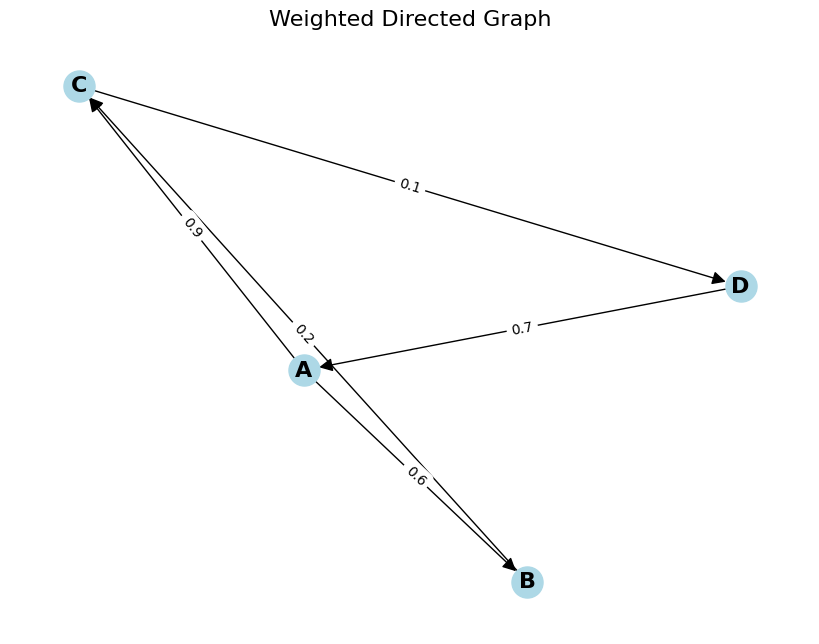

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add weighted edges
G.add_edge('A', 'B', weight=0.6)
G.add_edge('B', 'C', weight=0.2)
G.add_edge('C', 'D', weight=0.1)
G.add_edge('D', 'A', weight=0.7)
G.add_edge('A', 'C', weight=0.9)

# Set up the plot
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold', 
        arrows=True, arrowsize=20)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title and remove axis
plt.title("Weighted Directed Graph", fontsize=16)
plt.axis('off')

# Display the plot
plt.show()


## 6. What is Dijkstra's algorithm?

One very good tutorial on Dijkstra's algorithm is at:

https://www.freecodecamp.org/news/dijkstras-shortest-path-algorithm-visual-introduction/


Here's an implementation of Dijkstra's algorithm in Python using a priority queue for efficient vertex selection

In [14]:
import heapq
from typing import List, Dict, Tuple

class Graph:
    def __init__(self):
        self.nodes: Dict[int, List[Tuple[int, int]]] = {}

    def add_edge(self, from_node: int, to_node: int, weight: int):
        if from_node not in self.nodes:
            self.nodes[from_node] = []
        if to_node not in self.nodes:
            self.nodes[to_node] = []
        self.nodes[from_node].append((to_node, weight))
        # For undirected graph, uncomment the following line:
        self.nodes[to_node].append((from_node, weight))

def dijkstra(graph: Graph, start: int) -> Dict[int, int]:
    distances = {node: float('infinity') for node in graph.nodes}
    distances[start] = 0
    pq = [(0, start)]
    
    while pq:
        current_distance, current_node = heapq.heappop(pq)
        
        if current_distance > distances[current_node]:
            continue
        
        for neighbor, weight in graph.nodes[current_node]:
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    
    return distances

# Example usage
g = Graph()
g.add_edge(0, 1, 2)
g.add_edge(0, 2, 6)
g.add_edge(1, 3, 5)
g.add_edge(2, 3, 8)
g.add_edge(3, 4, 10)
g.add_edge(3, 5, 15)
g.add_edge(4, 5, 6)
g.add_edge(4, 6, 2)
g.add_edge(5, 6, 6)


start_node = 0
shortest_distances = dijkstra(g, start_node)

print(f"Shortest distances from node {start_node}:")
for node, distance in shortest_distances.items():
    print(f"To node {node}: {distance}")


Shortest distances from node 0:
To node 0: 0
To node 1: 2
To node 2: 6
To node 3: 7
To node 4: 17
To node 5: 22
To node 6: 19


### We can use animation to show Dijkstra's algorithm for above example

In [16]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create graph
G = nx.Graph()

edges = [
    (0, 1, 2), (0, 2, 6), (1, 3, 5), (2, 3, 8),
    (3, 4, 10), (3, 5, 15), (4, 5, 6), (4, 6, 2), (5, 6, 6)
]
G.add_weighted_edges_from(edges)

# Initialize animation components
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])
ax = fig.add_subplot(gs[0])
ax_table = fig.add_subplot(gs[1])
ax_table.axis('off')

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'weight')

# Function to generate frames for Dijkstra's algorithm
def dijkstra_with_frames(graph, start):
    distances = {node: float('inf') for node in graph.nodes}
    distances[start] = 0
    pq = [(0, start)]
    visited = set()
    frames = []

    while pq:
        current_distance, current_node = heapq.heappop(pq)
        if current_node in visited:
            continue
        
        visited.add(current_node)
        frames.append((current_node, dict(distances), set(visited)))

        for neighbor in graph.neighbors(current_node):
            weight = graph[current_node][neighbor]['weight']
            if (new_dist := current_distance + weight) < distances[neighbor]:
                distances[neighbor] = new_dist
                heapq.heappush(pq, (new_dist, neighbor))
    
    return frames


def update(frame):
    ax.clear()
    current_node, dist_snapshot, visited_snapshot = frame
    
    # Draw graph with weights
    node_colors = [
        "green" if node == current_node else 
        "red" if node in visited_snapshot else "lightblue"
        for node in G.nodes
    ]
    
    nx.draw_networkx_nodes(G, pos, ax=ax, node_color=node_colors, node_size=700)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray')
    nx.draw_networkx_labels(G, pos, ax=ax, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels)
    
    # Create and display table
    df = pd.DataFrame({
        'Node': G.nodes(),
        'Distance': [f"{dist_snapshot[n]:.1f}" if dist_snapshot[n] < float('inf') else "∞" 
                    for n in G.nodes],
        'Visited': ["✓" if n in visited_snapshot else "✗" for n in G.nodes]
    }).set_index('Node')
    
    ax_table.clear()
    ax_table.axis('off')
    table = ax_table.table(
        cellText=df.values,
        rowLabels=df.index,
        colLabels=df.columns,
        cellLoc='center',
        loc='center',
        colWidths=[0.3, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)

# Generate animation (using your dijkstra_with_frames function)
frames = dijkstra_with_frames(G, 0)
ani = FuncAnimation(fig, update, frames=frames, interval=1000)

# Jupyter Notebook automatically renders the last object in a cell if it is a Matplotlib figure. 
# The following is important to avoid duplicated plots
plt.close(fig)  # Prevents duplicate static plot

HTML(ani.to_jshtml())



## 7.	Build an unweighted, unidirectional graph with 32 nodes and random outgoing edges (e.g., 5 edges per node) using the networkx library. Then, use Dijkstra's algorithm to find the shortest path between any pair of nodes, excluding self-loops.

In [17]:
import networkx as nx
import random

# Create a directed graph
G = nx.Graph()

# Add 32 nodes
G.add_nodes_from(range(32))

# Add random edges (5 per node)
for node in G.nodes():
    edges = random.sample([n for n in G.nodes() if n != node], 5)
    G.add_edges_from((node, edge) for edge in edges)

# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Function to find shortest path between two nodes
def find_shortest_path(graph, start, end):
    try:
        path = nx.shortest_path(graph, source=start, target=end, method='dijkstra')
        return path
    except nx.NetworkXNoPath:
        return None

# Example usage
start_node = 0
end_node = 31
shortest_path = find_shortest_path(G, start_node, end_node)

if shortest_path:
    print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
else:
    print(f"No path exists from {start_node} to {end_node}")


Shortest path from 0 to 31: [0, 31]


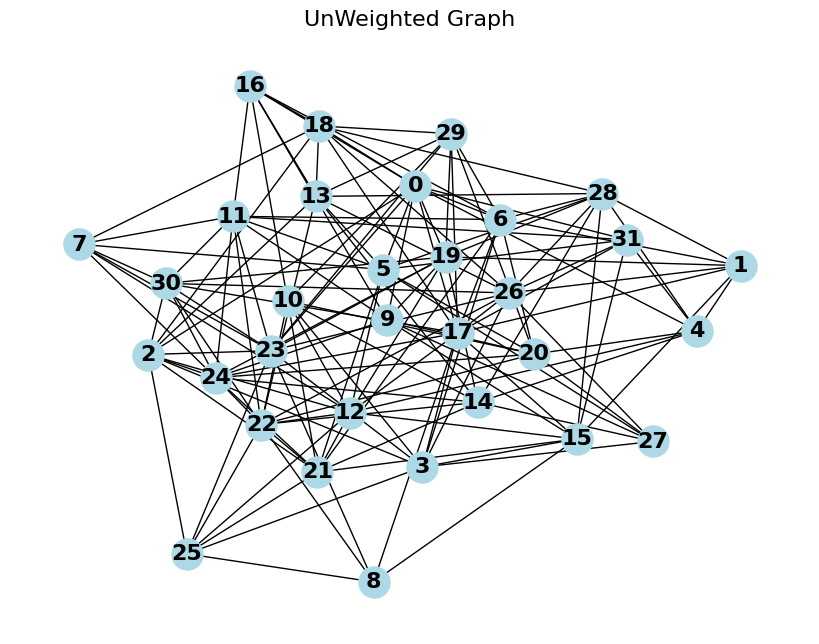

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Set up the plot
pos = nx.spring_layout(G)
plt.figure(figsize=(8, 6))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold', 
        arrows=True, arrowsize=20)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title and remove axis
plt.title("UnWeighted Graph", fontsize=16)
plt.axis('off')

# Display the plot
plt.show()

## 8. Understand the differences between CML and Dijkstra's algorithm.

### in progress ...